In [1]:
from langgraph.graph import StateGraph 
from langgraph.graph.state import END,START
from typing import TypedDict,Literal
import random

In [2]:
# making state
class State(TypedDict):
    user_query:str

In [3]:
# making nodes
def node_1(state) -> dict:
    print("--Node 1---")
    return {"user_query":state["user_query"] + " I am"}
def node_2(state) -> dict:
    print("--Node 2--")
    return {"user_query":state["user_query"] + " Happy"}
def node_3(state) -> dict:
    print("--Node 3--")
    return {"user_query":state["user_query"] + " Sad"}

In [4]:
# making Conditonal Edges Fun
def mood_decide(state):
    user_input = state["user_query"]
    if random.random() > 0.5:
        return "node_2"
    return "node_3"

In [5]:
# making edges
builder = StateGraph(state_schema=State)
builder.add_node("node_1",node_1)
builder.add_node("node_2",node_2)
builder.add_node("node_3",node_3)
builder.add_edge(START,"node_1")
builder.add_conditional_edges("node_1",mood_decide)
builder.add_edge("node_2",END)
builder.add_edge("node_3",END)
graph = builder.compile()

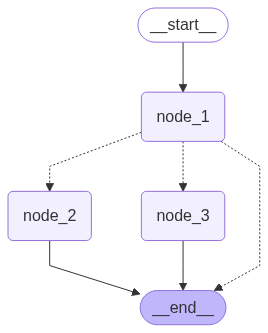

In [6]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
while True:
    ask = input("who are You :")
    if ask.lower() == "x":
        break
    else:
        prompt = State(user_query=ask)
        result = graph.invoke(prompt)
        print(result)
    

--Node 1---
--Node 3--
{'user_query': 'i am khan I am Sad'}
